# Logistic Regression

We consider a binary classification problem, where the dataset contains pairs of the form $(x, y)$, where $x$ is a 2D-point and $y \in \{-1, +1\}$ is the binary label.

Samples with positive labels are generated according to a normal distribution $\mathcal{N}(\mu_+, \sigma^2 I)$, with unknown mean $\mu_+$ and covariance $\sigma^2 I$. Samples with negative labels are generated according to a normal distribution $\mathcal{N}(\mu_-, \sigma^2 I)$, with unknown mean $\mu_-$ and same covariance $\sigma^2 I$.

Our goal is to fit a Logistic model to the observations by using the Gradient Descent procedure.

## Dataset generation
We start by creating the dataset we will be using for the optimization process. 

In [55]:
import pandas as pd

In [56]:
import numpy as np


n = 300 # Number of samples for each class
d = 2   # Dimension

mu_pos = 1. * np.ones(d)
mu_neg = -1. * np.ones(d)
sigma = 1.

X_pos = mu_pos + sigma * np.random.randn(n, d)
y_pos = np.ones(n)
X_neg = mu_neg + sigma * np.random.randn(n, d)
y_neg = -np.ones(n)
X_1 = np.ones(2*n).reshape(2*n,1)
X = np.vstack((X_pos, X_neg))
# X = np.hstack((X_1,X))    #add a column of 1 at the beginning
y = np.hstack((y_pos, y_neg))

In [71]:
# print(X)

Let us visualize the generated points.

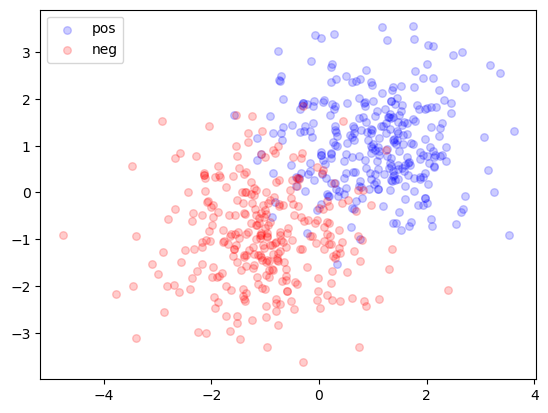

In [58]:
import matplotlib.pyplot as plt

plt.scatter(X_pos[:, 0], X_pos[:, 1], s=30, color='b', label='pos', alpha=.2)
plt.scatter(X_neg[:, 0], X_neg[:, 1], s=30, color='r', label='neg', alpha=.2)
plt.legend()
plt.show()

### Question 1
Our goal is to learn the posterior probability $\mathbb{P}(Y=+1 | X=x)$ with the following parametric model:
$$
  \mathbb{P}(Y=+1 | X=x) = \frac{\exp(w^\top x)}{1 + \exp(w^\top x)} \enspace.
$$
We use the negative log-likelihood as the loss function. Write the expression of the loss $\mathcal{L}(w)$.

### Question 2
Define a function `logistic_loss(w, X, y)` computing the loss $\mathcal{L}(w)$ defined above on the dataset `(X, y)`.

$$
\mathbb{P}(Y_i = y_i) =  \begin{cases} 
    \sigma(w^T x_i), & \text{if } y_i = 1 \\ 
    1 - \sigma(w^T x_i), & \text{if } y_i = 0 
\end{cases}\\
$$
Calculating the MLE by an equivalent expression for Probabilities:
$$
\prod_{i}^n (\frac{y_i+1}{2})\sigma (w^T x_i) +(\frac{1-y_i}{2})(1-\sigma (w^T x_i)) 
$$
$$
=\prod_{i}^n (\frac{2y_i\sigma( w^T x_i)+1-y_i}{2})
$$
$$
=\prod_{i}^n (\frac{y_i(2\sigma( w^T x_i)-1)+1}{2})
$$
Applying the negative log on the above expression, we get the loss function as:\\
$$
J(w) = \sum_i -log(y_i(2\sigma (w^T x_i)-1)+1)+log(2)
$$
Finding the gradient with respect to w, we get:
$$
dJ = \sum_i -\frac{2y_i\sigma'(w^T x_i)}{2y_i\sigma(w^T x_i)-y_i+1}x_i^T dw
$$
Hence, $$\nabla_w J=\sum_i -\frac{2y_i\sigma'(w^T x_i)}{2y_i\sigma(w^T x_i)-y_i+1}x_i$$

In [59]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [60]:
def logistic_loss(w, X, y):    #y = 600*1
    loss = 0
  
    # TODO
    product = X@w     #600*1
    sig = np.array(sigmoid(product))   #600*1


    #unhash
    loss_array = -np.log(np.multiply(y,(2*sig -np.ones(y.size)))+np.ones(y.size))+ np.log(2)*np.ones(y.size)
    # print(loss_array.shape)
    loss = np.sum(loss_array)
    
    return (1/y.size)*loss

## Gradient Descent
A popular optimization method to find a good estimate of the parameter $w^\star$ is the gradient descent. The overall idea is to start from some initial guess $w_0$, compute the gradient of the loss $\nabla \mathcal{L}$ at $w_0$ and update the parameter in the opposite direction
$$
w_1 = w_0 - \gamma \nabla\mathcal{L}(w_0) \enspace,
$$
where $\gamma > 0$ is an hyperparameter called step size. Then, the updating process is repeated for a set amount of iterations.

### Question 3
What is the gradient of $\mathcal{L}(w)$? Implement a function `gradient(w, X, y)` that returns $\nabla \mathcal{L}(w)$.

In [61]:
def sig_prime(x):
    return (np.exp(-x)/(1+np.exp(-x))**2)

In [62]:
def gradient(w, X, y):
    grad = np.zeros(w.shape)
    # TODO
    product = X@w
    coeff1 = -2*sig_prime(product)*y
    coeff2 = np.multiply((2*sigmoid(product)-np.ones(y.size)),y)+np.ones(y.size)
    coeff = coeff1/coeff2
    d = [X[i]*coeff[i] for i in range(y.size)]
    for i in d:
        grad = grad+i
    # print(n)
    return (1/y.size)*grad
    

The gradient descent procedure is partially defined in the function `gradient_descent(w0, step_size=1e-2, n_iter=100)` below. Complete it and test your `gradient` implementation with it.

In [63]:
def gradient_descent(X,y,w0, step_size, n_iter=1000):
    w = w0.copy()
    loss_evolution = []
    for m in range(n_iter):
        # TODO: Update w
        w = w-step_size*gradient(w,X,y)        
        loss_evolution.append(logistic_loss(w, X, y))
    return w, loss_evolution

The following script runs the gradient descent procedure and plot the decision boundary.

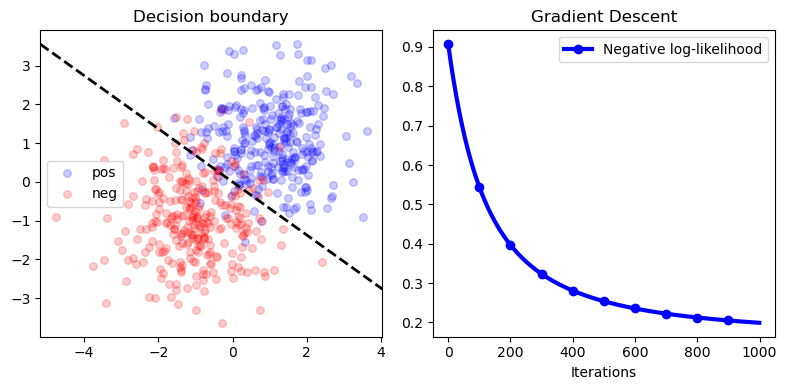

In [64]:
w0 = np.array([-1., 1.])
est_w, loss_values = gradient_descent(X,y,w0,1e-2)
# print(loss_values)

fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout='tight')
# Data points
axs[0].scatter(X_pos[:, 0], X_pos[:, 1], s=30, color='b', label='pos', alpha=.2)
axs[0].scatter(X_neg[:, 0], X_neg[:, 1], s=30, color='r', label='neg', alpha=.2)

# Boundary
axis_xlim = axs[0].get_xlim()
axis_ylim = axs[0].get_ylim()
axs[0].plot(axis_xlim, -np.array(axis_xlim) * est_w[0] / est_w[1],linewidth=2, linestyle='--', color='k')
# axs[0].plot(axis_xlim, -np.array(axis_xlim) * est_w[1] / est_w[2] - est_w[0] / est_w[2],linewidth=2, linestyle='--', color='k')
axs[0].set_xlim(axis_xlim)
axs[0].set_ylim(axis_ylim)

axs[0].legend()
axs[0].set_title('Decision boundary')

# Loss
axs[1].plot(loss_values, linewidth=3, color='b', marker='o',
            markevery=100, label='Negative log-likelihood')
# axs[1].set_ylim([0, 1.])
axs[1].set_xlabel('Iterations')
axs[1].legend()
axs[1].set_title('Gradient Descent')
plt.show()


### Question 4
Try the above procedure for different values of the `step_size`. What do you notice? Same question for $\sigma^2$.

standard deviation =  1 step size =  0.0001


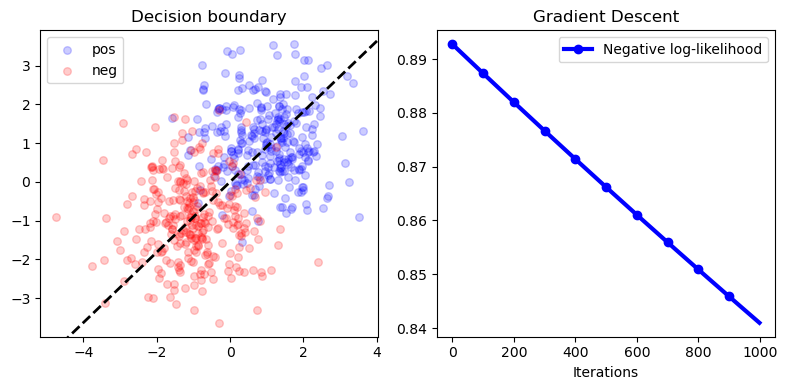

standard deviation =  1 step size =  0.001


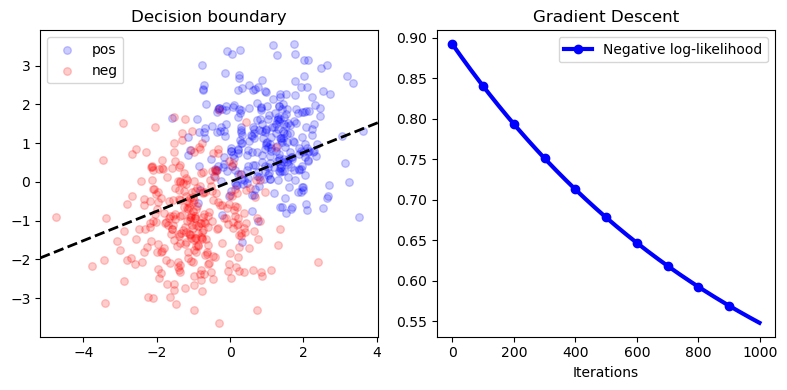

standard deviation =  1 step size =  0.01


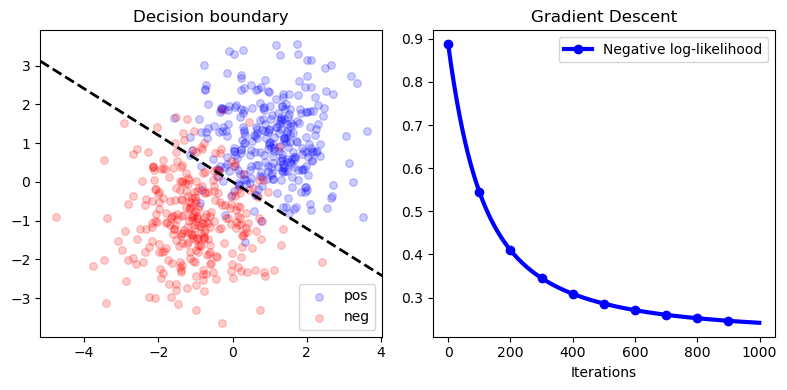

standard deviation =  1 step size =  0.1


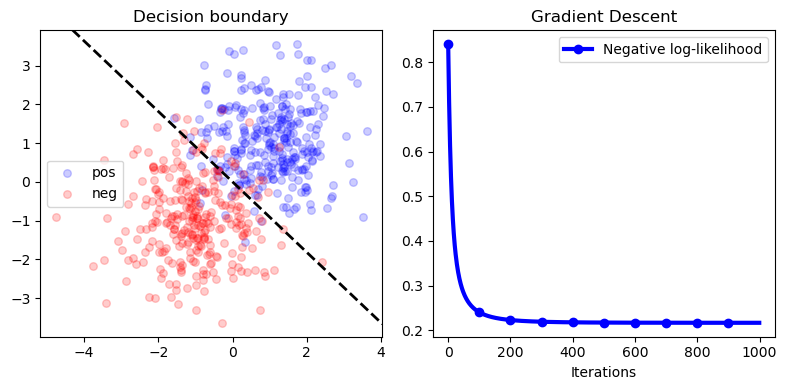

standard deviation =  1 step size =  1.0


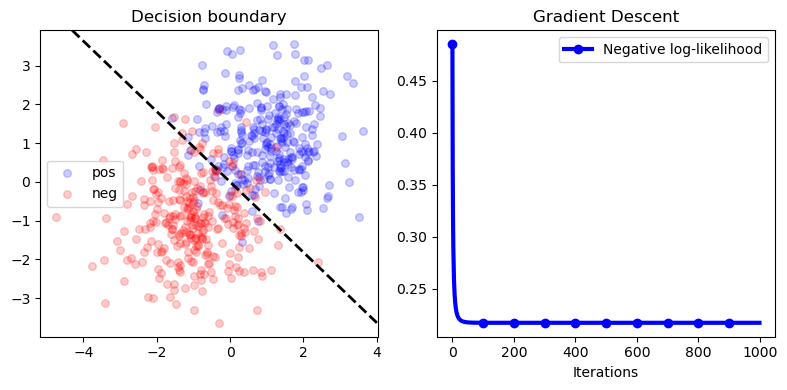

standard deviation =  2 step size =  0.0001


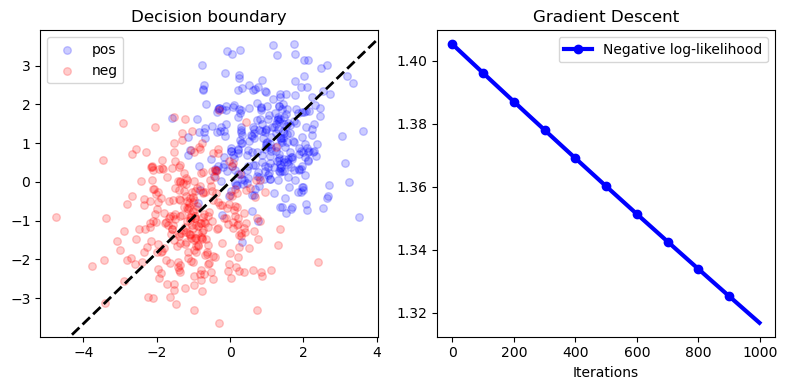

standard deviation =  2 step size =  0.001


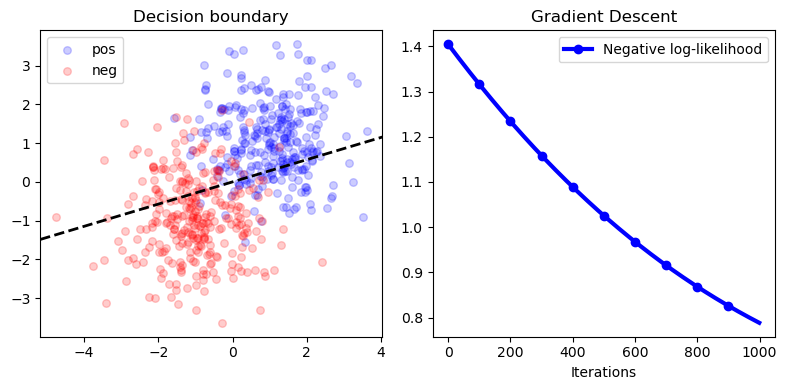

standard deviation =  2 step size =  0.01


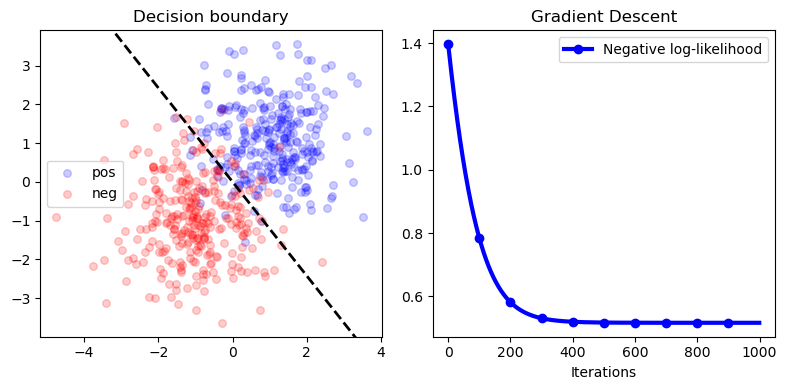

standard deviation =  2 step size =  0.1


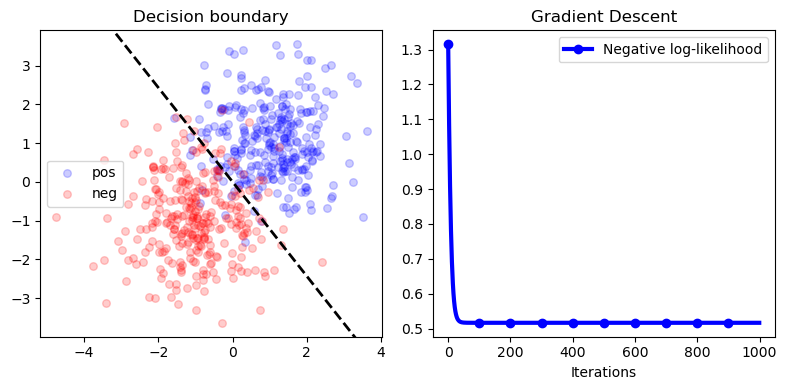

standard deviation =  2 step size =  1.0


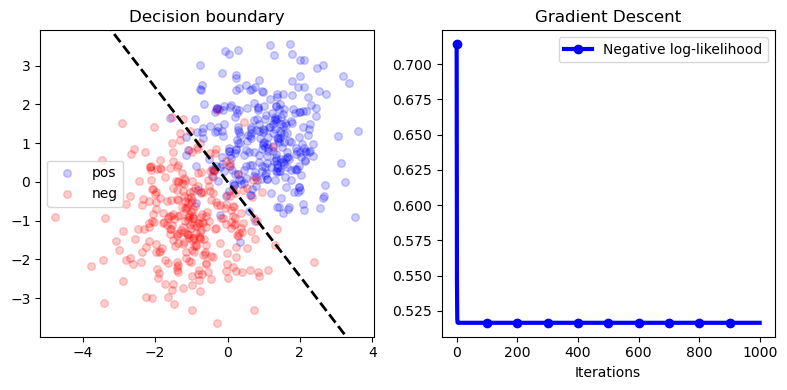

standard deviation =  3 step size =  0.0001


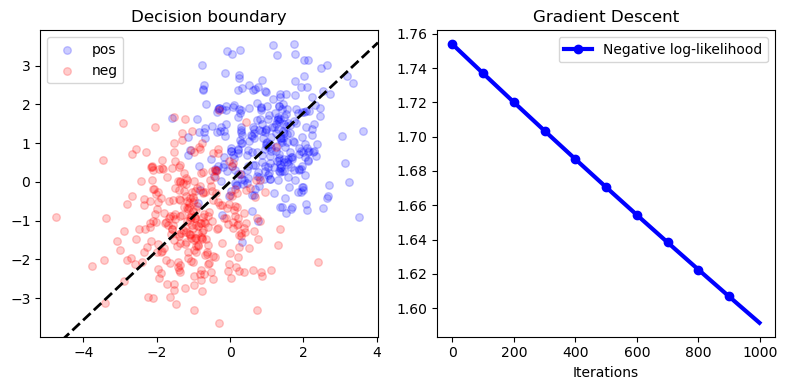

standard deviation =  3 step size =  0.001


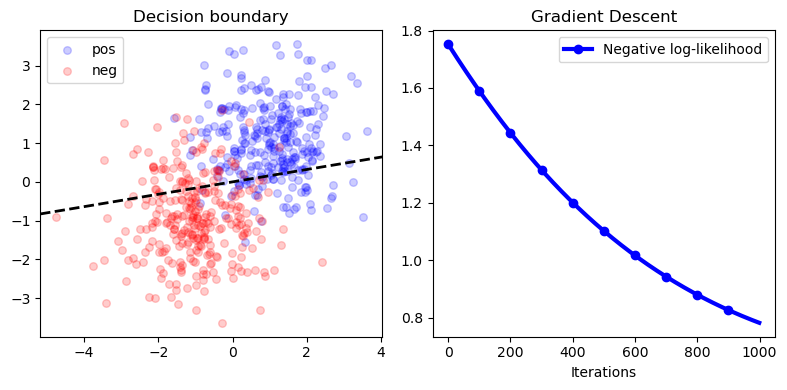

standard deviation =  3 step size =  0.01


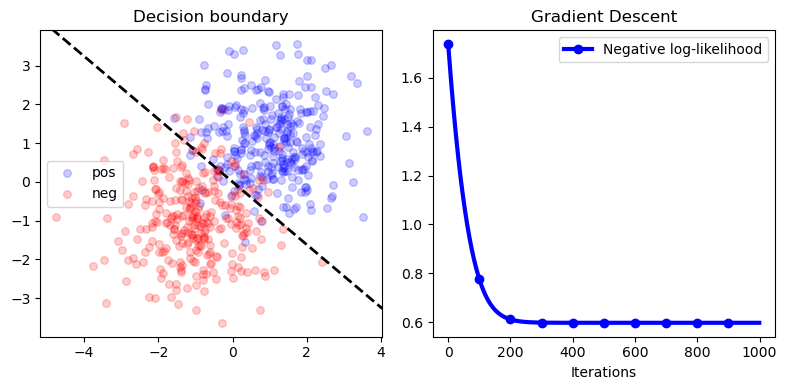

standard deviation =  3 step size =  0.1


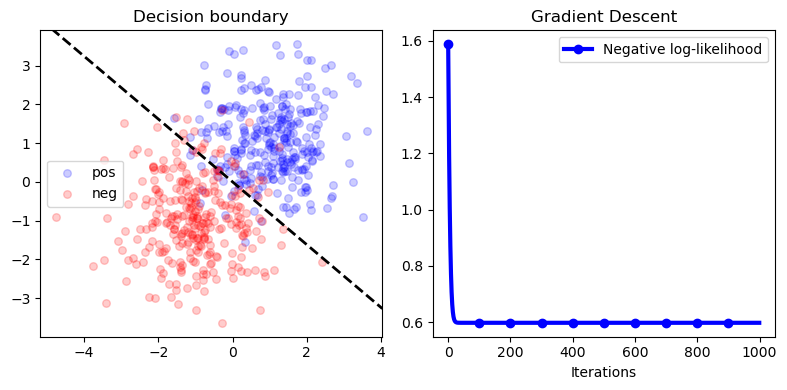

standard deviation =  3 step size =  1.0


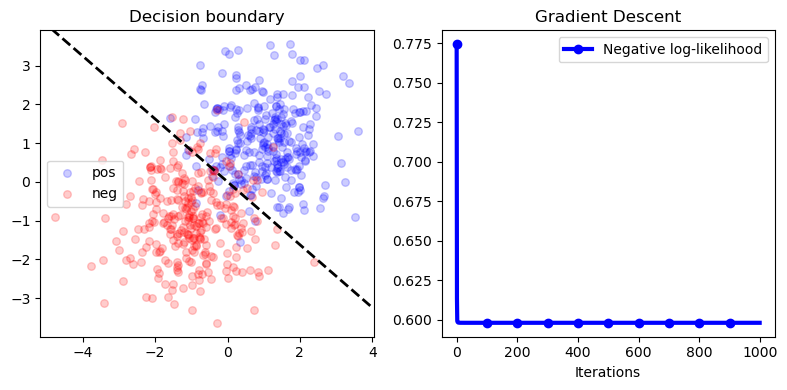

standard deviation =  4 step size =  0.0001


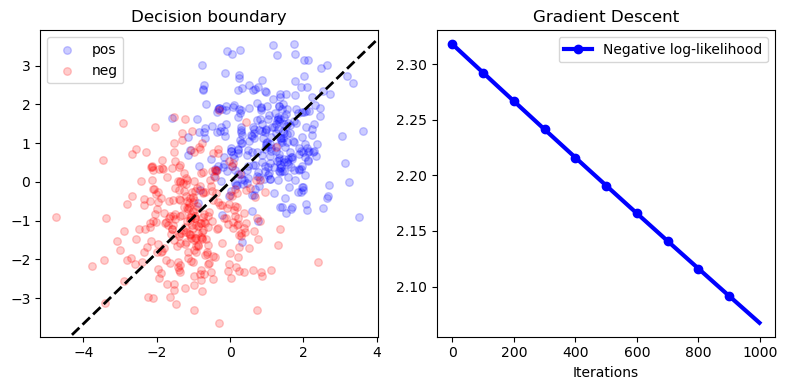

standard deviation =  4 step size =  0.001


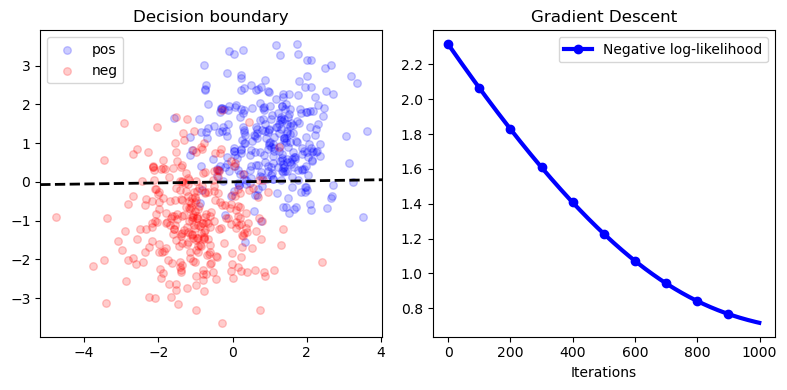

standard deviation =  4 step size =  0.01


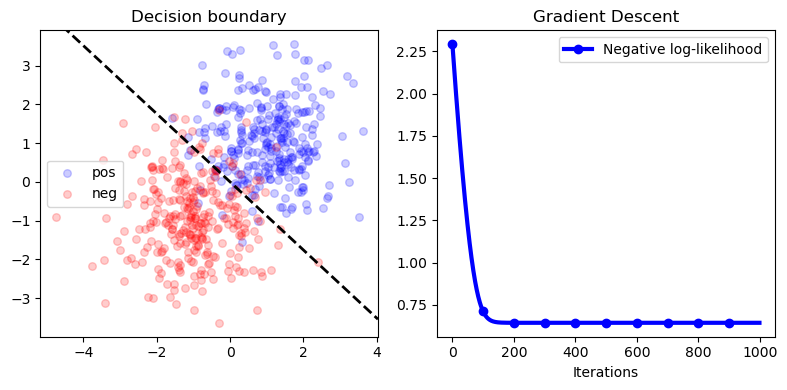

standard deviation =  4 step size =  0.1


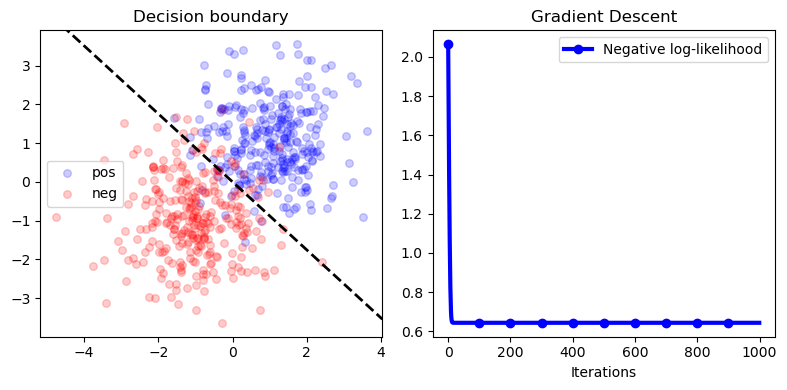

standard deviation =  4 step size =  1.0


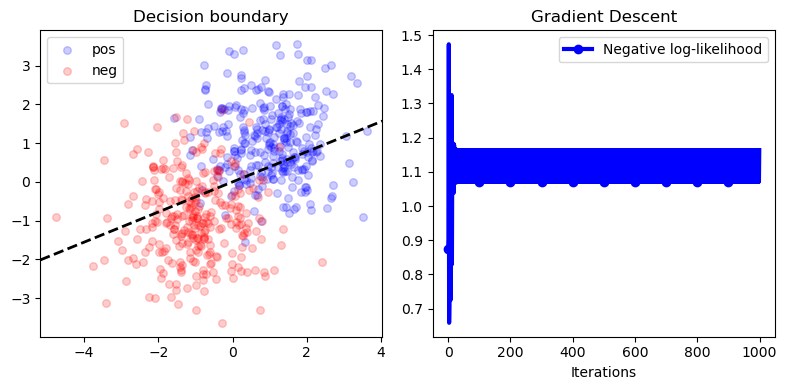

In [72]:
n = 300 # Number of samples for each class
d = 2   # Dimension

# Create new data
for i in range(1,5):
    mu_pos1 = 1. * np.ones(d)
    mu_neg1 = -1. * np.ones(d)
    sigma1 = i
    
    X_pos1 = mu_pos1 + sigma1 * np.random.randn(n, d)
    y_pos1 = np.ones(n)
    X_neg1 = mu_neg1 + sigma1 * np.random.randn(n, d)
    y_neg1 = -np.ones(n)
    X_1 = np.ones(2*n).reshape(2*n,1)
    X1 = np.vstack((X_pos1, X_neg1))
    # X = np.hstack((X_1,X))    #add a column of 1 at the beginning
    y1 = np.hstack((y_pos1, y_neg1))




#plotting values for different values of step size
    j = 1e-4
    while(j<10):
        print("standard deviation = ",sigma1,"step size = ",j)
        w0 = np.array([-1., 1.])
        est_w, loss_values = gradient_descent(X1,y1,w0,j)
        # print(loss_values)
        
        fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout='tight')
        # Data points
        axs[0].scatter(X_pos[:, 0], X_pos[:, 1], s=30, color='b', label='pos', alpha=.2)
        axs[0].scatter(X_neg[:, 0], X_neg[:, 1], s=30, color='r', label='neg', alpha=.2)
        
        # Boundary
        axis_xlim = axs[0].get_xlim()
        axis_ylim = axs[0].get_ylim()
        axs[0].plot(axis_xlim, -np.array(axis_xlim) * est_w[0] / est_w[1],linewidth=2, linestyle='--', color='k')
        # axs[0].plot(axis_xlim, -np.array(axis_xlim) * est_w[1] / est_w[2] - est_w[0] / est_w[2],linewidth=2, linestyle='--', color='k')
        axs[0].set_xlim(axis_xlim)
        axs[0].set_ylim(axis_ylim)
        
        axs[0].legend()
        axs[0].set_title('Decision boundary')
        
        # Loss
        axs[1].plot(loss_values, linewidth=3, color='b', marker='o',
                    markevery=100, label='Negative log-likelihood')
        # axs[1].set_ylim([0, 1.])
        axs[1].set_xlabel('Iterations')
        axs[1].legend()
        axs[1].set_title('Gradient Descent')
        plt.show()
        j=j*10



## Stochastic Gradient Descent
Remember that the loss $\mathcal{L}$ can be written as
$$
\mathcal{L}(w) = \frac{1}{n} \sum_{i = 1}^n \ell(w; \mathbf{x}_i, y_i) \enspace,
$$
where $\ell(w; \mathbf{x}, y)$ is the negative log-likelihood associated to the sample $(\mathbf{x}_i, y_i)$.

To compute the full gradient, one has to sum $n$ partial gradients $\nabla \ell(w; \mathbf{x}_i, y_i)$. In many machine learning settings, the number of observations $n$ is much larger than a few hundreds, and computing the gradient becomes the bottleneck of the optimization process.

Stochastic Gradient Descent sacrifices accuracy in favor of a much quicker gradient computation. One way to implement it is to select uniformly at random a pair $(\mathbf{x}_i, y_i)$, compute the incomplete gradient $\nabla \ell(w; \mathbf{x}_i, y_i)$ associated to the pair and update the estimate $w$ as if it were the complete gradient. Then, at the following iteration, a pair is randomly drawn again and the estimate is again updated accordingly, _etc_.

### Bonus
Complete the SGD implementation below and compare it to the gradient descent algorithm.

In [66]:
def stochastic_gradient_descent(w0, X, y, step_size=5e-2, n_iter=500):
    w = w0.copy()
    loss_evolution=[]
    for _ in range(n_iter):
        # Select a random index
        rnd_idx = np.random.randint(X.shape[0])
        # TODO: Update w
        grad = gradient(w0, X[rnd_idx], y[rnd_idx])
        w = w-step_size*grad
        loss_evolution.append(logistic_loss(w, X[rnd_idx], y[rnd_idx])) 
    return w,loss_evolution

SGD can be further improved by selecting a mini-batch of samples instead of a unique pair. Modify the previous implementation so that it selects several indices at each iteration.

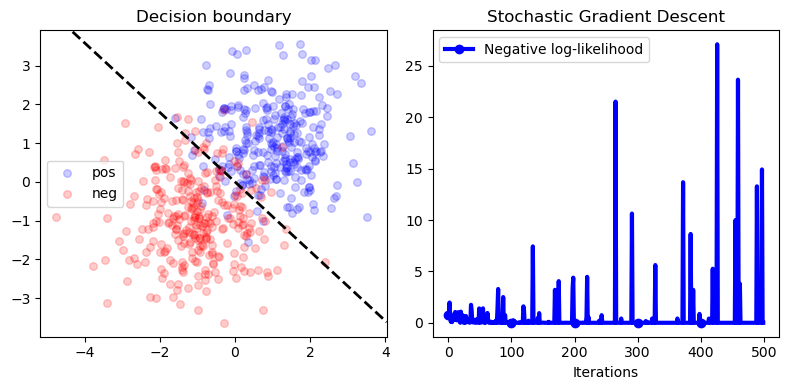

In [67]:
w0 = np.array([-1., 1.])
est_w, loss_values = stochastic_gradient_descent(w0,X,y)
# print(loss_values)

fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout='tight')
# Data points
axs[0].scatter(X_pos[:, 0], X_pos[:, 1], s=30, color='b', label='pos', alpha=.2)
axs[0].scatter(X_neg[:, 0], X_neg[:, 1], s=30, color='r', label='neg', alpha=.2)

# Boundary
axis_xlim = axs[0].get_xlim()
axis_ylim = axs[0].get_ylim()
axs[0].plot(axis_xlim, -np.array(axis_xlim) * est_w[0] / est_w[1],linewidth=2, linestyle='--', color='k')
# axs[0].plot(axis_xlim, -np.array(axis_xlim) * est_w[1] / est_w[2] - est_w[0] / est_w[2],linewidth=2, linestyle='--', color='k')
axs[0].set_xlim(axis_xlim)
axs[0].set_ylim(axis_ylim)

axs[0].legend()
axs[0].set_title('Decision boundary')

# Loss
axs[1].plot(loss_values, linewidth=3, color='b', marker='o',
            markevery=100, label='Negative log-likelihood')
# axs[1].set_ylim([0, 1.])
axs[1].set_xlabel('Iterations')
axs[1].legend()
axs[1].set_title('Stochastic Gradient Descent')
plt.show()

In [68]:
a = np.array([1,2,3])
b = np.array([3,4,6])
c = np.concatenate(([a],[b]),axis =0)

print(c.shape)
print(c)
rnd_idx = np.random.randint(X.shape[0],size = 5)
X[rnd_idx]


(2, 3)
[[1 2 3]
 [3 4 6]]


array([[-1.17686419, -0.68485392],
       [-0.73014959,  2.37467632],
       [-0.4250361 ,  0.13929858],
       [-0.79603315, -2.28299191],
       [ 0.6732866 ,  0.428775  ]])

In [69]:
def batch_stochastic_gradient_descent(w0, X, y, step_size=1e-2, n_iter=500):
    w = w0.copy()
    loss_evolution=[]
    for _ in range(n_iter):
        # Select a random index
        rnd_idx = np.random.randint(X.shape[0],size = 15)
        # TODO: Update w
        grad = gradient(w0, X[rnd_idx], y[rnd_idx])
        w = w-step_size*grad
        loss_evolution.append(logistic_loss(w, X[rnd_idx], y[rnd_idx])) 
    return w,loss_evolution

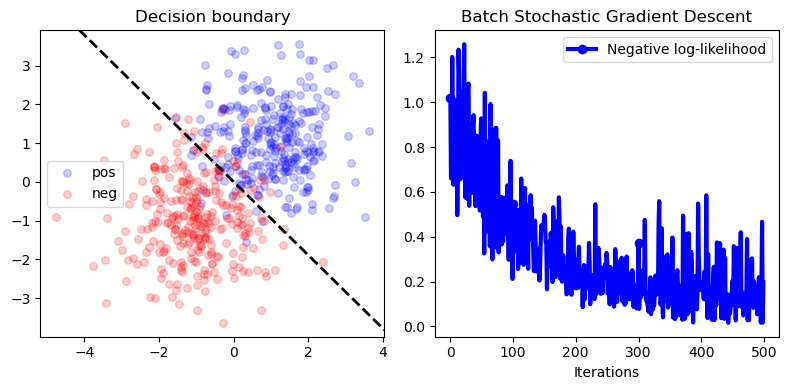

In [70]:
w0 = np.array([-1., 1.])
est_w, loss_values = batch_stochastic_gradient_descent(w0,X,y)
# print(loss_values)

fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout='tight')
# Data points
axs[0].scatter(X_pos[:, 0], X_pos[:, 1], s=30, color='b', label='pos', alpha=.2)
axs[0].scatter(X_neg[:, 0], X_neg[:, 1], s=30, color='r', label='neg', alpha=.2)

# Boundary
axis_xlim = axs[0].get_xlim()
axis_ylim = axs[0].get_ylim()
axs[0].plot(axis_xlim, -np.array(axis_xlim) * est_w[0] / est_w[1],linewidth=2, linestyle='--', color='k')
# axs[0].plot(axis_xlim, -np.array(axis_xlim) * est_w[1] / est_w[2] - est_w[0] / est_w[2],linewidth=2, linestyle='--', color='k')
axs[0].set_xlim(axis_xlim)
axs[0].set_ylim(axis_ylim)

axs[0].legend()
axs[0].set_title('Decision boundary')

# Loss
axs[1].plot(loss_values, linewidth=3, color='b', marker='o',
            markevery=100, label='Negative log-likelihood')
# axs[1].set_ylim([0, 1.])
axs[1].set_xlabel('Iterations')
axs[1].legend()
axs[1].set_title('Batch Stochastic Gradient Descent')
plt.show()